In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Define Growth Functions
# assumption: V(t=0) = 1 mm^3

def logisticGrowth(a, K, V):
    return (a * V * (1 - V/K))

def dynamicCCGrowth(a, b, V, K):
    return (a * V * np.log2(K/V), b * V **(2/3))

def gompertzGrowth(a, beta, V, t):
    return a * np.exp(-1 * beta * t) * V

def bertalanfyyGrowth(a, b, gamma, V):
    return (a * V**gamma - b * V)


In [2]:
def forwardEuler(a, K, V0, T, dt, deriv):
    num_steps = int(T / dt)
    V = np.zeros(num_steps + 1)
    V[0] = V0
    for n in range(num_steps):
        V[n+1] = V[n] + dt * deriv(a,K,V[n])
    return V

In [18]:
V_logistic_FE = forwardEuler(0.5, 2, 1, 100, 0.01, logisticGrowth)

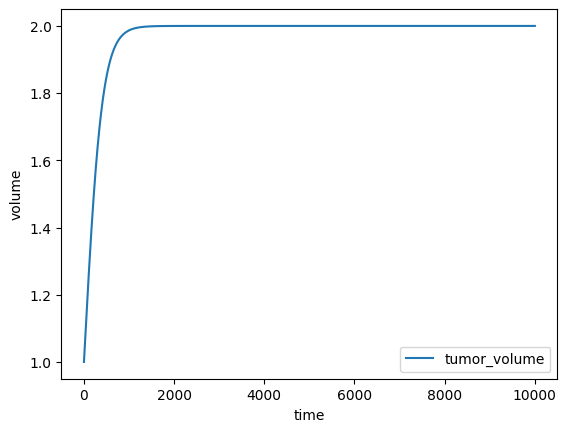

In [19]:
data = {'tumor_volume': V_logistic_FE, 't': [i for i in range(int(100/0.01) + 1)]}
df = pd.DataFrame.from_dict(data)
plot = df.plot(kind='line', x='t', y=['tumor_volume'], xlabel='time', ylabel='volume')